In [10]:
#Quick introduction and first handling of the dataset :
import pandas as pd

# Load the dataset
df = pd.read_csv('https://query.data.world/s/kqie3njk5bv6yvtbgd4ss2dkbc6vml?dws=00000')

# Display basic information about the dataset
print("Dataset Info:")
print(df.info())

# Display the first few rows of the dataset
print("\nFirst Few Rows:")
print(df.head())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe(include='all'))

# Unique values in each column
print("\nUnique Values in Each Column:")
for column in df.columns:
    print(f"{column}: {df[column].nunique()} unique values")

# Value counts for specific columns
print("\nValue Counts:")
print("Segment Type:")
print(df['Segment Type'].value_counts())
print("\nSegment Description:")
print(df['Segment Description'].value_counts())
print("\nAnswer:")
print(df['Answer'].value_counts())




Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5460 entries, 0 to 5459
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Question             5460 non-null   object 
 1   Segment Type         5460 non-null   object 
 2   Segment Description  5460 non-null   object 
 3   Answer               5460 non-null   object 
 4   Count                5460 non-null   int64  
 5   Percentage           5460 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 256.1+ KB
None

First Few Rows:
                                            Question Segment Type  \
0  What do you think when an influencer is obviou...       Mobile   
1  What do you think when an influencer is obviou...       Mobile   
2  What do you think when an influencer is obviou...       Mobile   
3  What do you think when an influencer is obviou...       Mobile   
4  What do you think when an influencer is obviou

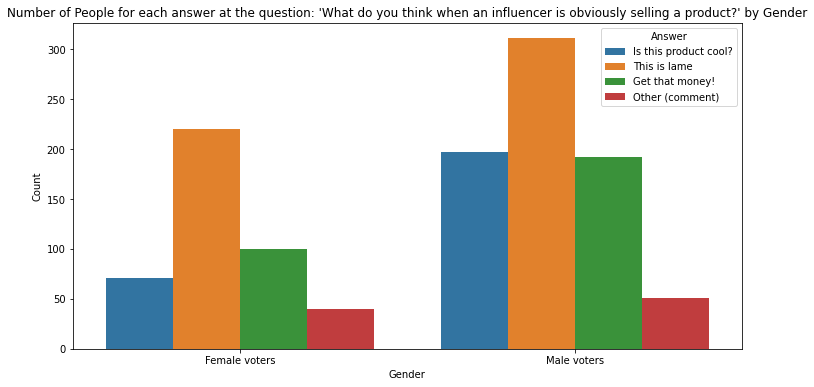

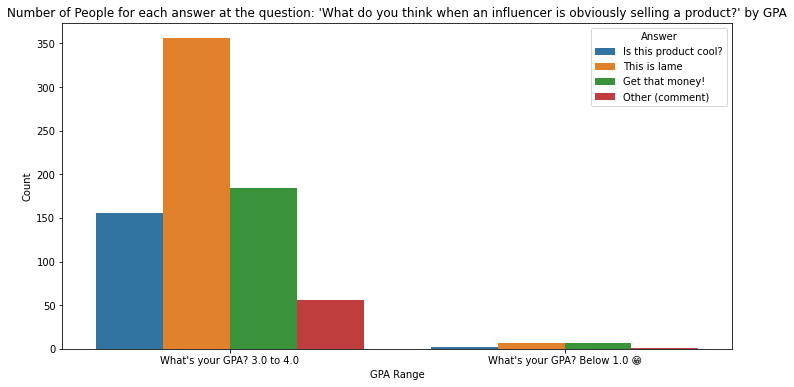

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('https://query.data.world/s/kqie3njk5bv6yvtbgd4ss2dkbc6vml?dws=00000')

# Choose the first question
question = df['Question'][0]

# Filter data for the selected question
selected_question_data = df[df['Question'] == question]

# Plot the bar chart for 'Male voters' and 'Female voters'
male_female_data = selected_question_data[selected_question_data['Segment Description'].isin(['Male voters', 'Female voters'])]
plt.figure(figsize=(12, 6))
sns.barplot(data=male_female_data, x='Segment Description', y='Count', hue='Answer')
plt.title("Number of People for each answer at the question: 'What do you think when an influencer is obviously selling a product?' by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# Plot the bar chart for "What's your GPA? 3.0 to 4.0" and "What's your GPA? Below 1.0 😁"
gpa_data = selected_question_data[selected_question_data['Segment Description'].isin(["What's your GPA? 3.0 to 4.0", "What's your GPA? Below 1.0 😁"])]
plt.figure(figsize=(12, 6))
sns.barplot(data=gpa_data, x='Segment Description', y='Count', hue='Answer')
plt.title("Number of People for each answer at the question: 'What do you think when an influencer is obviously selling a product?' by GPA")
plt.xlabel("GPA Range")
plt.ylabel("Count")
plt.show()


In [32]:
import numpy as np

# You can adjust the values of node and total_node as needed
node = 7
total_node = 10

p = node / total_node

if 1 - p == 0:
    entropy = 0
else:
    entropy = -(p * np.log2(p) + (1 - p) * np.log2(1 - p))

gini = 1 - (p**2 + (1 - p)**2)

print(f"Entropy = {entropy}\nGini Index = {gini}")

# Split 1
red_dot_entropy, red_dot_gini = 0, 0
blue_dot_entropy, blue_dot_gini = -0.85 * np.log2(0.85) - 0.15 * np.log2(0.15), 0.4

print("\nSplit 1:")
print(f"- Red Dot (p = 1): Entropy = {red_dot_entropy}, Gini = {red_dot_gini}")
print(f"- Blue Dot (p = 8/11): Entropy = {blue_dot_entropy:.2f}, Gini = {blue_dot_gini:.2f}")

# Split 2
red_dot_entropy, red_dot_gini = 0, 0
blue_dot_entropy, blue_dot_gini = -0.72 * np.log2(0.72) - 0.28 * np.log2(0.28), 0.32

print("\nSplit 2:")
print(f"- Red Dot (p = 1): Entropy = {red_dot_entropy}, Gini = {red_dot_gini}")
print(f"- Blue Dot (p = 8/10): Entropy = {blue_dot_entropy:.2f}, Gini = {blue_dot_gini:.2f}")

# Split 3
red_dot_entropy, red_dot_gini = 0, 0
blue_dot_entropy, blue_dot_gini = -0.5 * np.log2(0.5) - 0.5 * np.log2(0.5), 0.2

print("\nSplit 3:")
print(f"- Red Dot (p = 1): Entropy = {red_dot_entropy}, Gini = {red_dot_gini}")
print(f"- Blue Dot (p = 8/9): Entropy = {blue_dot_entropy:.2f}, Gini = {blue_dot_gini:.2f}")

# Split 4
red_dot_entropy, red_dot_gini = -0.7 * np.log2(0.7) - 0.3 * np.log2(0.3), 0.42
blue_dot_entropy, blue_dot_gini = 0, 0

print("\nSplit 4:")
print(f"- Red Dot (p = 7/10): Entropy = {red_dot_entropy:.2f}, Gini = {red_dot_gini:.2f}")
print(f"- Blue Dot (p = 1): Entropy = 0, Gini = 0")



Entropy = 0.8812908992306927
Gini Index = 0.42000000000000004

Split 1:
- Red Dot (p = 1): Entropy = 0, Gini = 0
- Blue Dot (p = 8/11): Entropy = 0.61, Gini = 0.40

Split 2:
- Red Dot (p = 1): Entropy = 0, Gini = 0
- Blue Dot (p = 8/10): Entropy = 0.86, Gini = 0.32

Split 3:
- Red Dot (p = 1): Entropy = 0, Gini = 0
- Blue Dot (p = 8/9): Entropy = 1.00, Gini = 0.20

Split 4:
- Red Dot (p = 7/10): Entropy = 0.88, Gini = 0.42
- Blue Dot (p = 1): Entropy = 0, Gini = 0
